In [69]:
import numpy as np
import pandas as pd
import thinkstats2, math
import nsfg
import thinkplot #matplotlib helper
%matplotlib inline

In [18]:
def ReadBrfss(filename='CDBRFS08.ASC.gz', compression='gzip', nrows=None):
    """Reads the BRFSS data.

    filename: string
    compression: string
    nrows: int number of rows to read, or None for all

    returns: DataFrame
    """
    var_info = [
        ('age', 101, 102, int),
        ('sex', 143, 143, int),
        ('wtyrago', 127, 130, int),
        ('finalwt', 799, 808, int),
        ('wtkg2', 1254, 1258, int),
        ('htm3', 1251, 1253, int),
        ]
    columns = ['name', 'start', 'end', 'type']
    variables = pd.DataFrame(var_info, columns=columns)
    variables.end += 1
    dct = thinkstats2.FixedWidthVariables(variables, index_base=1)

    df = dct.ReadFixedWidth(filename, compression=compression, nrows=nrows)
    CleanBrfssFrame(df)
    return df

In [19]:
 def CleanBrfssFrame(df):
        df.age.replace([7,9], float('NaN'), inplace=True)
        
        df.htm3.replace([999], float('NaN'), inplace=True)
        
        df.wtkg2.replace([99999], float('NaN'), inplace=True)
        df.wtkg2 /= 100.0
        
        df.wtyrago.replace([7777,9999], float('NaN'), inplace=True)
        df['wtyrago'] = df.wtyrago.apply(lambda x: x/2.2 if x < 9000 else x-9000)

In [20]:
brfss = ReadBrfss(nrows=None)
brfss.shape


(414509, 6)

In [22]:
complete = brfss.dropna(subset=['htm3', 'wtkg2'])
complete.shape

(395832, 6)

In [23]:
compelte.head()

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0
5,42.0,1,118.181818,415.161314,109.09,183.0


In [24]:
complete.describe()

,age,sex,wtyrago,finalwt,wtkg2,htm3
count,393518.000000,395832.000000,388137.000000,395832.000000,395832.000000,395832.000000
mean,54.891207,1.612730,79.766921,562.527274,79.044413,168.956188
std,16.742237,0.487127,20.574880,1076.206594,19.547890,10.390752
min,18.000000,1.000000,22.727273,1.695143,20.000000,61.000000
25%,43.000000,1.000000,64.545455,97.241254,64.550000,163.000000
50%,55.000000,2.000000,77.272727,234.914579,77.270000,168.000000
75%,67.000000,2.000000,90.909091,593.585278,90.910000,178.000000
max,99.000000,2.000000,342.272727,60995.111700,300.000000,236.000000


In [25]:
sample = thinkstats2.SampleRows(complete, 1000)

In [27]:
heights = sample.htm3
weights = sample.wtkg2

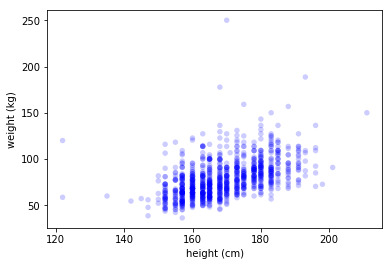

In [28]:
thinkplot.Scatter(heights, weights)
thinkplot.Config(xlabel='height (cm)',
                ylabel='weight (kg)',
                legend=False)

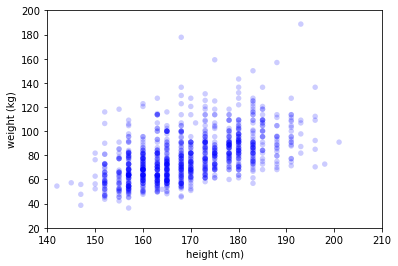

In [30]:
thinkplot.Scatter(heights, weights)
thinkplot.Config(xlabel='height (cm)',
                ylabel='weight (kg)',
                 axis=[140,210,20,200],
                legend=False)

In [35]:
heights = thinkstats2.Jitter(heights, 2.0)
weights = thinkstats2.Jitter(weights, 0.5)

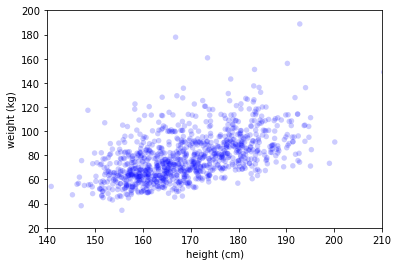

In [36]:
thinkplot.Scatter(heights, weights)
thinkplot.Config(xlabel='height (cm)',
                ylabel='weight (kg)',
                 axis=[140,210,20,200],
                legend=False)

In [37]:
sample = thinkstats2.SampleRows(complete, 100000)

In [41]:
heights = sample.htm3
weights = sample.wtkg2

In [42]:
heights = thinkstats2.Jitter(heights, 2.0)
weights = thinkstats2.Jitter(weights, 0.5)

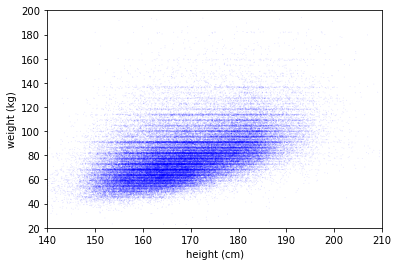

In [44]:
thinkplot.Scatter(heights, weights, alpha=0.1, s=1)
thinkplot.Config(xlabel='height (cm)',
                ylabel='weight (kg)',
                 axis=[140,210,20,200],
                legend=False)

In [47]:
sample = complete
heights = sample.htm3
weights = sample.wtkg2
heights = thinkstats2.Jitter(heights, 3.5)
weights = thinkstats2.Jitter(weights, 1.5)

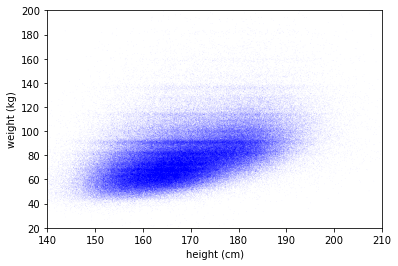

In [48]:
thinkplot.Scatter(heights, weights, alpha=0.07, s=0.5)
thinkplot.Config(xlabel='height (cm)',
                ylabel='weight (kg)',
                 axis=[140,210,20,200],
                legend=False)

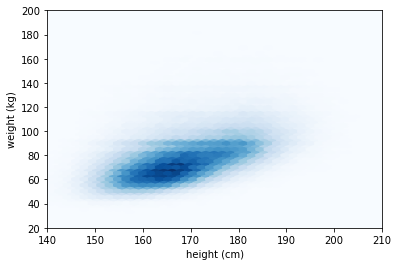

In [49]:
thinkplot.HexBin(heights, weights)
thinkplot.Config(xlabel='height (cm)',
                ylabel='weight (kg)',
                axis=[140,210,20,200],
                legend=False)

In [52]:
bins = np.arange(135,210,10)
indices = np.digitize(complete.htm3, bins)
groups = complete.groupby(indices)

In [54]:
mean_heights = [group.htm3.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups][1:-1]

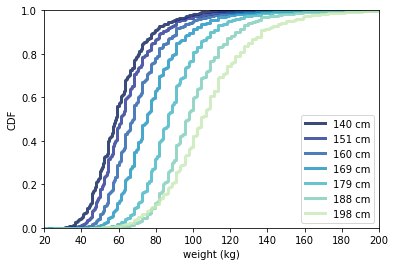

In [55]:
thinkplot.PrePlot(7)
for mean, cdf in zip(mean_heights, cdfs):
    thinkplot.Cdf(cdf, label='%.0f cm' % mean)
    
thinkplot.Config (xlabel='weight (kg)',
                 ylabel=  'CDF',
                 axis=[20,200,0,1],
                 legend=True)

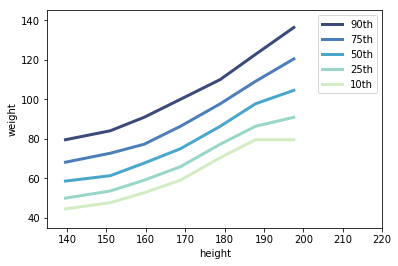

In [56]:
thinkplot.PrePlot(5)
for percent in [90,75,50,25,10]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_heights, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='height',
                ylabel = 'weight',
                axis=[135,220,35,145],
                legend=True)


In [58]:
heights.corr(weights)

0.48067084295330154

In [59]:
heights.corr(np.log(weights))

0.50191310743418227

In [60]:
heights.corr(weights, method='spearman')

0.50999393384674208

In [61]:
inter, slope = thinkstats2.LeastSquares(heights, weights)
inter, slope

(-66.097362811541117, 0.85902541521353459)

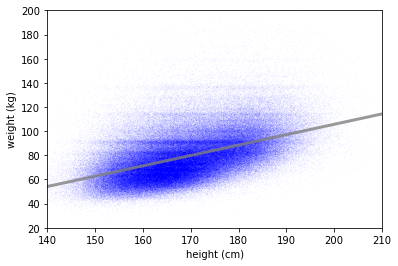

In [62]:
fit_xs, fit_ys = thinkstats2.FitLine(heights, inter, slope)
thinkplot.Scatter(heights, weights, alpha=0.07, s=0.5)
thinkplot.Plot(fit_xs, fit_ys, color='gray')
thinkplot.Config(xlabel='height (cm)',
                 ylabel='weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

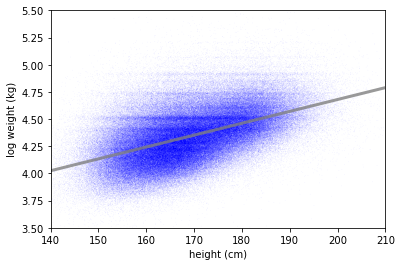

In [63]:
log_weights = np.log(weights)
inter, slope = thinkstats2.LeastSquares(heights, log_weights)
fit_xs, fit_ys = thinkstats2.FitLine(heights, inter, slope)
thinkplot.Scatter(heights, log_weights, alpha=0.07, s=0.5)
thinkplot.Plot(fit_xs, fit_ys, color='gray')
thinkplot.Config(xlabel='height (cm)',
                 ylabel='log weight (kg)',
                 axis=[140, 210, 3.5, 5.5],
                 legend=False)

In [65]:
inter, slope = thinkstats2.LeastSquares(heights, weights)
res = thinkstats2.Residuals(heights, weights, inter, slope)

In [66]:
var_y = weights.var()
var_res = res.var()
R2 = 1 - var_res / var_y
R2

0.23104640189651304

In [70]:
math.sqrt(R2)

0.4806728636989122

In [71]:
thinkstats2.Corr(heights, weights)

0.48067084295330048

In [74]:
RMSE_without = weights.std()
RMSE_without

19.604405938765638

In [75]:
RMSE_with = res.std()
RMSE_with

17.191103434721452

395832